# Process Mining Module -  PDEng program Data Science - JADS 

This notebook is part of the Process Mining module of the JADS PDEng program on Data Science. It accompanies Lecture 1 on *Event Logs and Process Discovery*. 
The collection of notebooks is a *living document* and subject to change. 

# Lecture 1 - 'Event Logs and Process Discovery' (R / bupaR)

* **Responsible Lecturer**: Dr. Felix Mannhardt, [@fmannhardt](https://twitter.com/fmannhardt)
* **Last Update**: 21th April 2021

## Setup

For this lecture, we are going to need the `tidyverse` and the `bupaR` packages.

In [1]:
## Perform the commented out commands below in a separate R session
# install.packages("tidyverse")
# install.packages("bupaR")

In [2]:
# for larger and readable plots
options(jupyter.plot_scale=1)

In [3]:
# the initial execution of these may give you warnings that you can safely ignore
library(tidyverse)
library(bupaR)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.0     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'bupaR'


The following object is masked from 'package:stats':

    filter


The following object is masked from 'package:utils':

    timestamp




## Event Logs

This part introduces event logs and their unique properties that provide the basis for any Process Mining method. Together with `bupaR` several event logs are distributed that can be loaded without further processing. 
In this lecture we are going to make use of the following datasets:

* Patients, a synthetically generated example event log in a hospital setting.
* Sepsis, a real-life event log taken from a Dutch hospital. The event log is publicly available here: https://doi.org/10.4121/uuid:915d2bfb-7e84-49ad-a286-dc35f063a460 and has been used in many Process Mining related publications.

### Exploring Event Data

Let us first explore the event data without any prior knowledge about event log structure or properties. We convert the `patients` event log below to a standard `tibble` (https://tibble.tidyverse.org/) and inspect the first rows.

In [4]:
patients %>%
    as_tibble() %>%
    head()

handling,patient,employee,handling_id,registration_type,time,.order
<fct>,<chr>,<fct>,<chr>,<fct>,<dttm>,<int>
Registration,1,r1,1,start,2017-01-02 11:41:53,1
Registration,2,r1,2,start,2017-01-02 11:41:53,2
Registration,3,r1,3,start,2017-01-04 01:34:05,3
Registration,4,r1,4,start,2017-01-04 01:34:04,4
Registration,5,r1,5,start,2017-01-04 16:07:47,5
Registration,6,r1,6,start,2017-01-04 16:07:47,6


The most important ingredient of an event log is the timestamps column `time`. This allows us to establish a sequence of events.

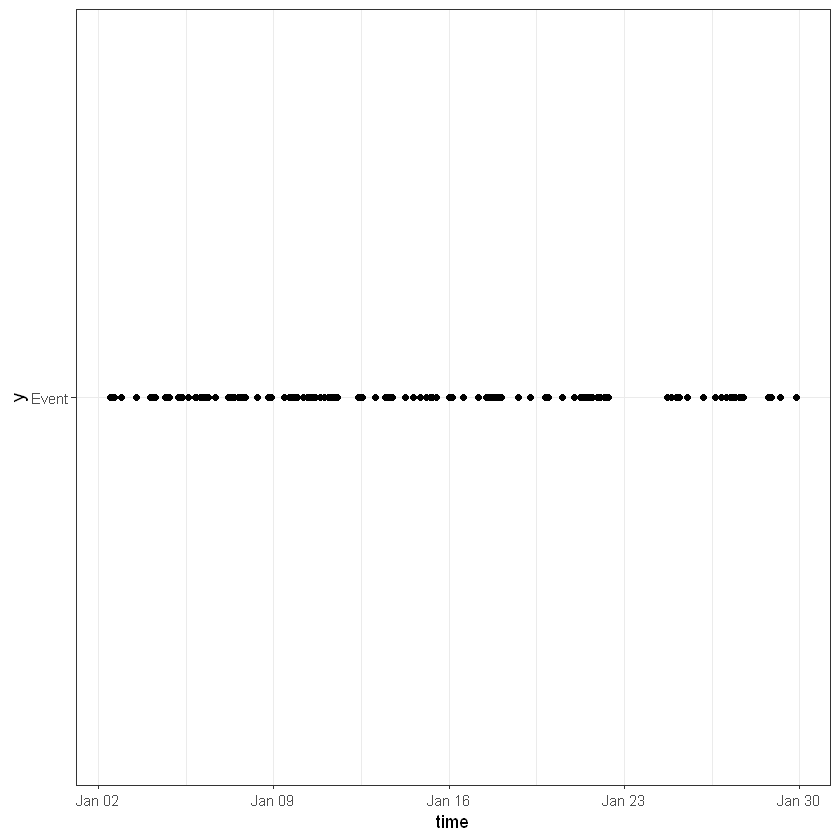

In [5]:
patients %>% 
  filter(time < '2017-01-31') %>% 
  ggplot(aes(time, "Event")) + 
  geom_point() + 
  theme_bw()

In [6]:
patients %>%
    as_tibble() %>% 
    distinct(handling)

handling
<fct>
Registration
Triage and Assessment
Blood test
MRI SCAN
X-Ray
Discuss Results
Check-out


In [7]:
patients %>%
    as_tibble() %>% 
    distinct(patient)  %>% 
    head()

patient
<chr>
1
2
3
4
5
6


In [8]:
patients %>%
    as_tibble() %>% 
    count(patient) %>% 
    head()

patient,n
<chr>,<int>
1,12
10,10
100,10
101,10
102,10
103,12


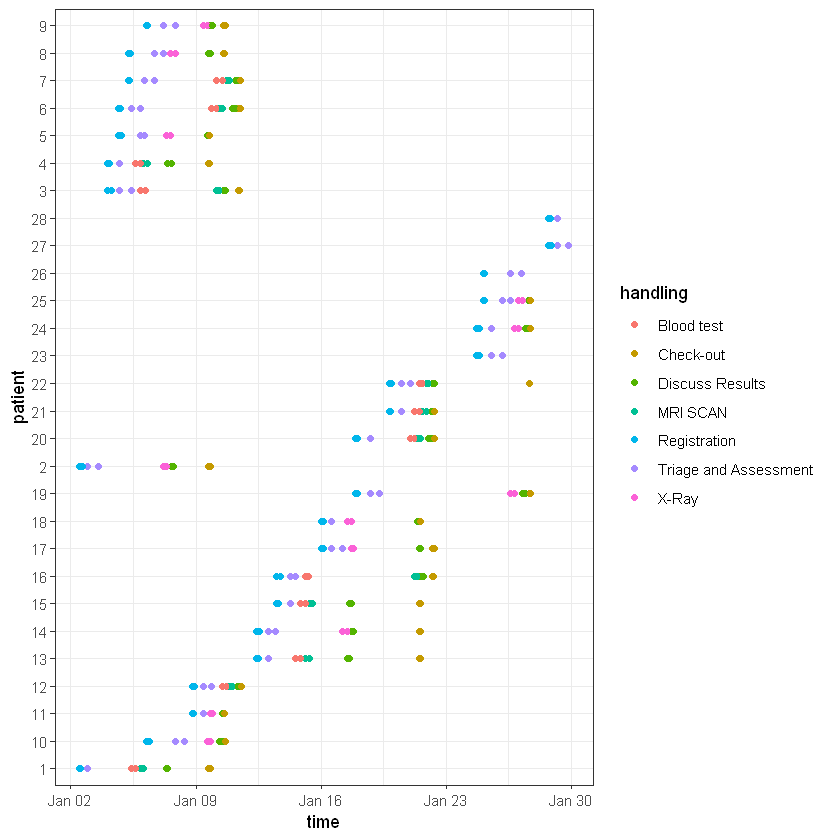

In [9]:
patients %>% 
  filter(time < '2017-01-31') %>% 
  ggplot(aes(time, patient, color = handling)) + 
  geom_point() + 
  theme_bw()

In [10]:
patients %>% 
  as_tibble() %>% 
  arrange(patient, time) %>% 
  head()

handling,patient,employee,handling_id,registration_type,time,.order
<fct>,<chr>,<fct>,<chr>,<fct>,<dttm>,<int>
Registration,1,r1,1,start,2017-01-02 11:41:53,1
Triage and Assessment,1,r2,501,start,2017-01-02 12:40:20,501
Registration,1,r1,1,complete,2017-01-02 12:40:20,2722
Triage and Assessment,1,r2,501,complete,2017-01-02 22:32:25,3222
Blood test,1,r3,1001,start,2017-01-05 08:59:04,1001
Blood test,1,r3,1001,complete,2017-01-05 14:34:27,3722


In [11]:
patients %>% 
  as_tibble() %>% 
  arrange(patient, time) %>% 
  head()

handling,patient,employee,handling_id,registration_type,time,.order
<fct>,<chr>,<fct>,<chr>,<fct>,<dttm>,<int>
Registration,1,r1,1,start,2017-01-02 11:41:53,1
Triage and Assessment,1,r2,501,start,2017-01-02 12:40:20,501
Registration,1,r1,1,complete,2017-01-02 12:40:20,2722
Triage and Assessment,1,r2,501,complete,2017-01-02 22:32:25,3222
Blood test,1,r3,1001,start,2017-01-05 08:59:04,1001
Blood test,1,r3,1001,complete,2017-01-05 14:34:27,3722


#### Reflection Questions

* What could be the reason a column `.order` is included in this dataset?
* How could the column `employee` be used?
* What is the use of the column `handling_id` and in which situation is it required?

### Basic Process Visualization

### Process Map Visualization

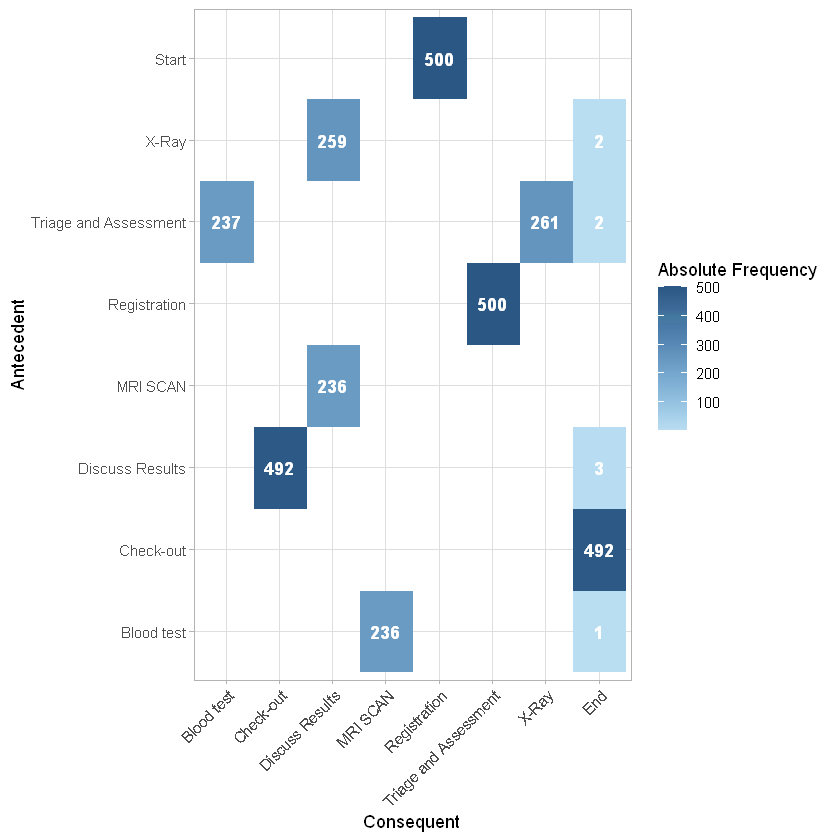

In [12]:
patients %>% 
    precedence_matrix() %>% 
    plot()